In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
price_arr = np.load('btc_price.npy')

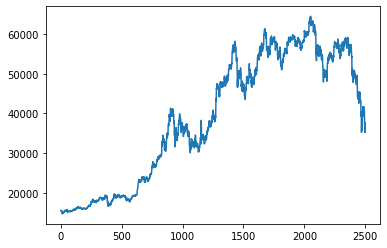

In [3]:
l = len(price_arr)
time = np.arange(l)
plt.plot(time, price_arr)
plt.show()

In [4]:
def make_A(n, sqrt_lambda):
    d1 = np.eye(n-1, n)
    d1 = np.roll(d1, 1)

    d2 = -np.eye(n-1, n)
    a2 = sqrt_lambda * (d1+d2)

    a1 = np.eye(n)
    A = np.vstack((a1, a2))
    return A

In [5]:
def make_b(n):
    b2 = np.zeros((n-1, 1))
    y = price_arr.reshape((n,1))
    b = np.vstack((y, b2))
    return b

In [6]:
def least_square(A, b):
    At = np.transpose(A)
    multi_A = np.matmul(At,A)
    multi_b = np.matmul(At,b)
    x = np.linalg.solve(multi_A, multi_b)
    return x

In [7]:
sqrt_lambda = 10
A = make_A(l, sqrt_lambda)
b = make_b(l)
denoise = least_square(A, b)

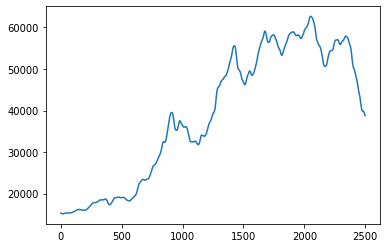

In [8]:
plt.plot(denoise)
plt.show()

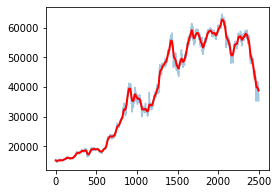

In [10]:
fig, ax = plt.subplots(figsize=(4,3))  
ax.plot(price_arr, label='noisy', alpha=0.4)
ax.plot(denoise,'r', linewidth=2, label='denoised')
plt.show()